# STAT1000J : US Macroeconomics Analysis
by Philip Tjuatja 524370990065 and Ethan Kahn Firtanto 5243709900

Source of Data: https://www.kaggle.com/datasets/khushikyad001/finance-and-economics-dataset-2000-present

The Finance & Economics Dataset provides daily financial and macroeconomic data, including stock market prices, GDP growth, inflation, interest rates, consumer spending, exchange rates, and more. It is designed for use in:

- ✔ Financial Market Analysis – Track stock index movements and trading volumes.
- ✔ Macroeconomic Research – Study economic trends, including inflation and GDP growth.
- ✔ Investment Decision Making – Evaluate interest rates, corporate profits, and consumer confidence.
- ✔ Machine Learning & Predictive Analytics – Develop forecasting models for economic indicators.

This dataset is valuable for economists, investors, data scientists, researchers, and policymakers.


In [839]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [840]:
original_df = pd.read_csv('finance_economics_dataset.csv').dropna()
original_df['Date'] = pd.to_datetime(original_df['Date'], errors='coerce')
original_df = original_df.sort_values(by='Date')
original_df 

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


From here, we split the DataFrames into 3 DFs, based on their stock index.
1. S&P 500

In [841]:
snp_df = original_df[original_df['Stock Index'] == 'S&P 500'].copy()
snp_df['Date'] = pd.to_datetime(snp_df['Date'], errors='coerce')  # Ensure 'Date' is in datetime format
snp_df

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
5,2000-01-06,S&P 500,2087.80,2124.76,2153.18,2085.18,82664194,1.42,6.08,3.24,...,1.39,140.00,60.23,2338.39,441.06,403,0.82,45,96.80,8613
12,2000-01-13,S&P 500,1250.61,1271.27,1293.68,1216.82,90792126,8.14,2.12,13.28,...,1.10,97.90,122.27,996.99,373.38,1138,6.33,1,53.43,8113
15,2000-01-16,S&P 500,3129.68,3099.33,3163.53,3055.58,415077918,1.43,9.15,12.98,...,0.98,120.13,88.91,1317.51,267.95,7930,3.20,15,39.56,10713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,2008-03-08,S&P 500,3925.00,3954.22,3997.72,3919.04,778294296,-0.12,0.49,13.63,...,0.95,90.98,32.22,2253.91,304.05,1212,0.87,14,37.11,5776
2991,2008-03-10,S&P 500,4901.64,4917.12,4950.15,4897.77,227063782,7.51,4.90,7.92,...,1.18,140.78,82.82,952.98,333.96,3624,5.73,22,23.90,12231
2994,2008-03-13,S&P 500,3593.86,3575.34,3617.87,3557.28,677342840,2.96,3.98,14.36,...,0.84,146.31,86.78,960.46,276.28,3418,2.98,16,24.30,7290
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261


2. NASDAQ

In [842]:
nasdaq_df = original_df[original_df['Stock Index'] == 'NASDAQ'].copy()
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'], errors='coerce')  # Ensure 'Date' is in datetime format
nasdaq_df

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
7,2000-01-08,NASDAQ,2798.96,2826.64,2864.47,2766.89,423890033,7.08,4.39,13.01,...,1.06,136.86,117.92,896.46,265.51,1011,7.33,37,98.89,3771
14,2000-01-15,NASDAQ,1556.98,1570.51,1581.57,1544.30,866560662,-3.37,7.26,13.86,...,1.23,149.06,73.35,1063.49,386.73,1171,2.37,11,44.83,5201
16,2000-01-17,NASDAQ,2644.38,2615.55,2682.99,2569.35,965696140,1.97,3.04,11.51,...,1.06,138.18,90.36,2143.77,487.03,4309,3.83,15,2.84,13591
17,2000-01-18,NASDAQ,2389.37,2343.52,2413.03,2310.00,3991992,9.66,7.42,11.54,...,0.91,98.43,113.38,2170.79,277.72,6698,6.03,2,62.21,14990
18,2000-01-19,NASDAQ,4599.33,4581.54,4630.22,4534.98,215525643,5.17,7.14,3.37,...,1.21,146.91,123.47,2332.18,492.52,4721,1.27,24,76.70,11054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2008-03-09,NASDAQ,4078.99,4112.85,4146.77,4073.85,975733242,4.49,8.38,7.90,...,1.31,87.18,59.19,924.51,111.86,1174,8.20,5,30.21,4922
2992,2008-03-11,NASDAQ,3294.25,3267.09,3324.98,3237.43,274066900,-2.43,8.15,8.70,...,1.45,98.58,46.93,1509.00,256.18,4867,1.23,27,48.44,12795
2993,2008-03-12,NASDAQ,2366.56,2343.96,2409.02,2334.49,935042038,8.96,3.13,8.75,...,0.99,145.91,63.38,814.23,308.52,8771,4.16,42,83.88,7682
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


3. Dow Jones

In [843]:
dj_df = original_df[original_df['Stock Index'] == 'Dow Jones'].copy()
dj_df['Date'] = pd.to_datetime(dj_df['Date'], errors='coerce')  # Ensure 'Date' is in datetime format
dj_df



,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
6,2000-01-07,Dow Jones,4037.59,3996.40,4055.78,3948.97,653722138,7.64,6.24,4.52,...,0.92,138.80,29.30,1309.15,319.60,4874,9.55,31,32.63,1303
8,2000-01-09,Dow Jones,4106.84,4141.59,4154.46,4062.99,867172199,5.97,4.87,9.42,...,1.02,112.13,104.95,2358.55,479.46,5193,5.18,30,75.26,13164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,2008-02-21,Dow Jones,3100.20,3066.36,3112.53,3028.09,393170205,6.22,5.84,9.24,...,0.87,83.68,31.85,1523.49,258.74,4677,5.36,45,7.81,4191
2984,2008-03-03,Dow Jones,4356.40,4328.37,4374.24,4314.14,886758407,-0.81,7.72,3.66,...,1.31,97.25,117.99,1896.91,464.95,4885,8.91,1,54.33,11021
2985,2008-03-04,Dow Jones,3202.64,3196.51,3217.63,3148.51,146672119,0.01,9.56,9.41,...,0.96,134.73,100.63,1027.57,396.72,4979,6.18,43,26.59,13356
2987,2008-03-06,Dow Jones,3912.47,3940.87,3942.76,3911.99,799316126,-3.46,7.28,8.73,...,1.19,118.67,135.33,1490.99,291.13,552,6.72,15,50.21,8769


## Queries and Dataset Exploration
1. Pivot Table  
    We create a pivot table to show the distributionn of average values in each year of each of these macroeconomic indicators from 2000 to 2008, for S&P 500, NASDAQ and Dow Jones.

In [844]:
pivot_snp = snp_df.copy()
pivot_snp['Year'] = pivot_snp['Date'].dt.year
table_snp = pivot_snp.pivot_table(index='Year', 
                             values=['Close Price', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'], 
                             aggfunc='mean')
table_snp

,Bankruptcy Rate (%),Close Price,Consumer Confidence Index,Consumer Spending (Billion USD),Corporate Profits (Billion USD),Crude Oil Price (USD per Barrel),Forex USD/EUR,Forex USD/JPY,GDP Growth (%),Gold Price (USD per Ounce),Government Debt (Billion USD),Inflation Rate (%),Interest Rate (%),Mergers & Acquisitions Deals,Real Estate Index,Retail Sales (Billion USD),Unemployment Rate (%),Venture Capital Funding (Billion USD)
Year,,,,,,,,,,,,,,,,,,
2000,4.811587,2812.044841,84.238095,7182.587302,2584.920635,79.597222,1.151984,116.240476,1.854921,1665.779841,16632.793651,5.550794,5.020714,24.015873,295.935238,4842.325397,8.868651,49.023810
2001,5.046043,2858.864532,84.640288,6978.309353,2670.733813,82.536115,1.119928,115.697338,2.815971,1653.847338,14512.187050,5.243237,5.352734,25.697842,314.071223,5159.798561,8.389496,53.764964
2002,4.323884,2962.525950,84.876033,7605.958678,2744.636364,92.170331,1.152975,117.627769,2.710826,1649.984545,14458.239669,5.369421,4.830992,25.256198,282.968347,5174.776860,8.841405,48.651405
2003,5.205126,3067.176303,84.899160,7863.529412,2613.277311,84.281681,1.123529,113.782857,2.604202,1612.615294,15221.815126,5.206723,5.249244,25.344538,295.137815,4467.722689,8.593361,51.017731
2004,4.401163,3007.606279,82.906977,7245.775194,2334.100775,85.470078,1.115039,117.467752,2.734806,1736.615349,13084.193798,5.318062,4.932016,24.418605,299.108837,5128.682171,8.345039,48.608062
2005,5.035750,3019.291583,84.983333,8148.508333,2695.283333,86.173417,1.123667,116.514667,2.549250,1692.729583,16503.375000,4.883417,5.544083,25.458333,296.720833,5050.116667,8.649833,50.869083
2006,4.756080,2938.418160,83.256000,7551.680000,2486.800000,85.116240,1.137920,114.919360,2.262960,1637.610160,15117.840000,5.480880,5.355200,25.448000,313.808960,5112.520000,8.285520,50.330560
2007,4.994609,2963.654141,85.085938,7577.656250,2410.585938,83.371875,1.149844,114.866328,2.497187,1636.365547,16468.382812,4.818672,5.196172,23.523438,297.324063,5244.250000,8.735156,48.458359
2008,5.461724,3088.645172,87.448276,7086.172414,2267.758621,75.510000,1.149655,115.537586,2.257586,1622.255862,16040.793103,4.491379,5.923103,19.689655,316.082069,5508.862069,8.886897,48.410345


In [845]:
pivot_nasdaq = original_df[original_df['Stock Index'] == 'NASDAQ'].copy()
pivot_nasdaq['Year'] = pivot_nasdaq['Date'].dt.year
table_nasdaq = pivot_nasdaq.pivot_table(index='Year', 
                             values=['Close Price', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'], 
                             aggfunc='mean')
table_nasdaq

,Bankruptcy Rate (%),Close Price,Consumer Confidence Index,Consumer Spending (Billion USD),Corporate Profits (Billion USD),Crude Oil Price (USD per Barrel),Forex USD/EUR,Forex USD/JPY,GDP Growth (%),Gold Price (USD per Ounce),Government Debt (Billion USD),Inflation Rate (%),Interest Rate (%),Mergers & Acquisitions Deals,Real Estate Index,Retail Sales (Billion USD),Unemployment Rate (%),Venture Capital Funding (Billion USD)
Year,,,,,,,,,,,,,,,,,,
2000,5.213628,3056.959558,84.247788,6986.017699,2729.221239,89.273363,1.153894,112.264690,1.787434,1700.666283,16243.106195,5.283717,5.447257,22.424779,306.840531,5285.929204,8.735752,48.563097
2001,5.044622,3000.114034,84.453782,7413.218487,2696.546218,82.863613,1.147899,115.141597,2.907395,1641.957983,14963.831933,4.869160,5.386975,25.235294,308.498403,5064.243697,9.532521,52.276218
2002,4.878438,2980.947734,86.039062,7554.078125,2375.914062,91.547734,1.159922,114.516875,2.463984,1743.594609,15840.187500,4.817500,5.256328,24.320312,296.373125,5087.867188,9.207656,52.745938
2003,4.860083,2923.618583,88.183333,7944.325000,2457.616667,81.843750,1.161500,113.439083,2.528250,1643.301833,16392.766667,4.737917,5.136250,26.283333,303.180500,5096.050000,8.568417,50.242917
2004,5.043103,2947.459655,83.017241,7975.250000,2551.310345,86.259741,1.142069,110.993362,2.875172,1631.794483,14555.793103,4.810172,5.143362,26.137931,297.111552,5164.629310,8.828362,52.268966
2005,5.632308,2940.229308,86.007692,7190.415385,2565.038462,83.857462,1.163154,112.978692,2.598154,1595.282462,15465.592308,5.099692,5.243769,23.330769,296.810923,4751.338462,8.569538,46.828308
2006,5.137910,2952.847239,85.910448,7381.350746,2661.410448,86.085896,1.128731,114.696343,3.125970,1630.441119,14940.873134,4.712164,5.174254,23.014925,295.652985,4826.320896,8.397612,49.578806
2007,5.067459,3100.448197,86.303279,7941.655738,2405.770492,85.504590,1.127131,116.956393,2.461557,1666.556230,15474.057377,4.616721,4.898279,24.024590,298.961393,5245.655738,9.195492,47.012623
2008,5.108400,2955.578800,86.360000,7132.840000,2529.800000,88.727600,1.194400,115.420000,3.383600,1651.124800,14207.080000,5.744000,5.388400,25.440000,295.302400,5631.320000,8.906000,54.679600


In [846]:
pivot_dj = original_df[original_df['Stock Index'] == 'Dow Jones'].copy()
pivot_dj['Year'] = pivot_dj['Date'].dt.year
table_dj = pivot_dj.pivot_table(index='Year', 
                             values=['Close Price', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'], 
                             aggfunc='mean')
table_dj

,Bankruptcy Rate (%),Close Price,Consumer Confidence Index,Consumer Spending (Billion USD),Corporate Profits (Billion USD),Crude Oil Price (USD per Barrel),Forex USD/EUR,Forex USD/JPY,GDP Growth (%),Gold Price (USD per Ounce),Government Debt (Billion USD),Inflation Rate (%),Interest Rate (%),Mergers & Acquisitions Deals,Real Estate Index,Retail Sales (Billion USD),Unemployment Rate (%),Venture Capital Funding (Billion USD)
Year,,,,,,,,,,,,,,,,,,
2000,5.211260,3102.091102,83.913386,7918.275591,2603.118110,85.575039,1.153858,115.765354,2.583937,1716.194488,14852.826772,5.367480,4.847953,24.354331,301.732362,4938.259843,8.383386,48.928976
2001,5.130000,3082.912617,84.214953,7454.102804,2464.149533,87.295140,1.156729,113.374112,3.035888,1647.575701,14096.233645,5.003738,5.093364,26.233645,297.478692,5180.663551,8.722523,46.704019
2002,5.233190,3206.751638,85.500000,7614.284483,2553.793103,84.165431,1.143448,115.097241,2.104310,1568.615517,16530.646552,4.758707,5.541638,24.603448,304.475086,5728.198276,8.899310,49.479569
2003,5.141746,3000.048810,85.238095,7614.436508,2273.785714,83.923810,1.140317,116.853968,3.412302,1710.328571,14971.865079,5.137460,5.288016,23.912698,319.973333,5303.801587,8.633651,48.685635
2004,4.996529,2862.074793,84.528926,8113.603306,2553.975207,87.081818,1.186612,118.598595,2.917603,1657.312810,14807.512397,5.060579,5.311736,25.231405,316.875207,5211.925620,8.350992,47.286033
2005,4.688174,2923.505565,83.904348,7911.582609,2315.895652,86.926522,1.182435,113.633217,2.468783,1622.894000,15366.817391,5.430261,5.265913,23.634783,287.261130,5046.495652,8.934348,55.626261
2006,5.211509,2852.280943,86.698113,7790.292453,2872.339623,90.923491,1.138302,115.591604,2.836415,1624.199245,15339.924528,5.267925,5.353396,23.386792,297.650566,4984.867925,8.206321,52.383679
2007,4.968174,2884.492261,87.278261,6598.052174,2786.034783,85.454957,1.138435,115.187826,2.239478,1631.318783,17270.886957,5.399304,5.329130,27.147826,288.778957,5117.895652,8.107739,49.605913
2008,5.245000,3536.070000,84.291667,7533.541667,2634.500000,80.952083,1.164583,113.359167,3.041250,1645.404167,15248.333333,5.640417,4.705417,20.791667,273.694583,5276.041667,8.116667,47.387500


2. Queries  
   We also queried to search for the times when the interest rate is raised to a very high percentage (above 9.5%) and the consumer spending is large (over 10,000 Billion USD) and found that over the course of 2000-2008, there are only 59 days where such events occurred.

In [847]:
# Use query to find rows with specific conditions

# Filter for inflation rates less than or equal to 1% and select Inflation Rate and CCI
high_inflation = original_df.query('`Interest Rate (%)` >= 9.5 and `Consumer Spending (Billion USD)` >= 10000')[['Date','Interest Rate (%)', 'Consumer Spending (Billion USD)']].sort_values(by='Date', ascending=True)
# Display the result
print(high_inflation.shape[0])
high_inflation

59


,Date,Interest Rate (%),Consumer Spending (Billion USD)
46,2000-02-16,9.80,14238
48,2000-02-18,9.52,13851
66,2000-03-07,9.99,12791
123,2000-05-03,9.73,13738
154,2000-06-03,9.82,13810
330,2000-11-26,9.61,14227
336,2000-12-02,9.51,14967
384,2001-01-19,9.54,14202
388,2001-01-23,9.68,13798
466,2001-04-11,9.77,13447


## Visualisations


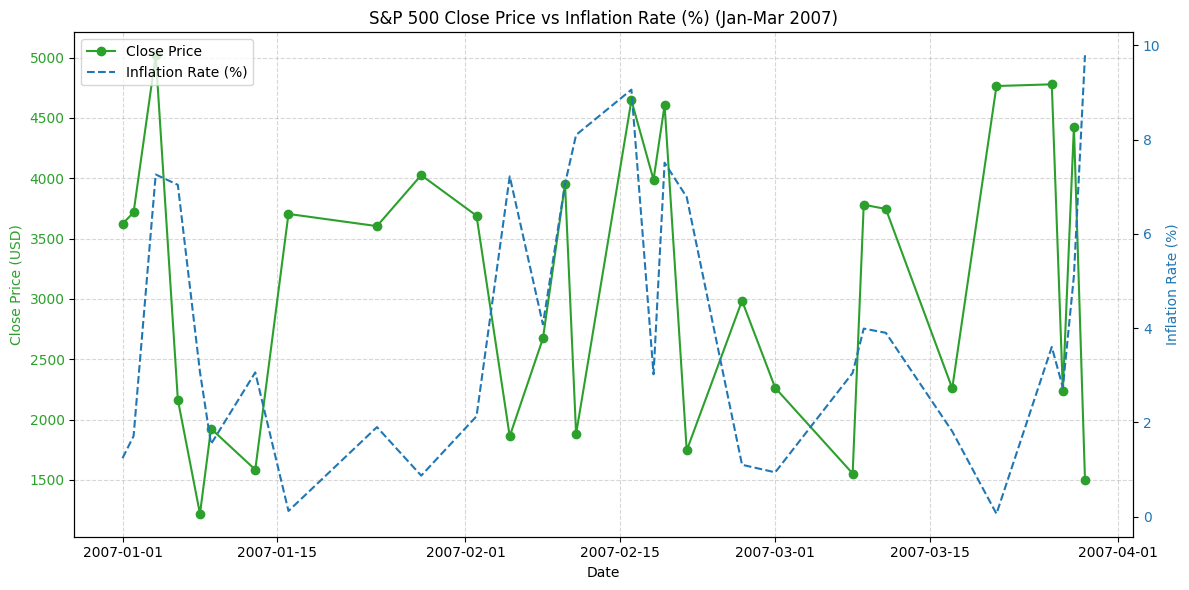

In [848]:

# Assuming your dataframe 'df' contains a 'Date' column
# Convert 'Date' to datetime if it's not already in that format

def plot_time_series(visual_df, title, column):
# Filter data for Jan-Mar 2007
    visual_df = visual_df.copy()
    df_filtered = visual_df[
        (visual_df['Date'].dt.year == 2007) & 
        (visual_df['Date'].dt.month.isin([1, 2, 3]))
    ].sort_values('Date')

    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Close Price (left y-axis)
    color = 'tab:green'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price (USD)', color=color)
    ax1.plot(df_filtered['Date'], df_filtered['Close Price'], 
            color=color, label='Close Price', marker='o')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Create secondary y-axis for Inflation Rate
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel(column, color=color)
    ax2.plot(df_filtered['Date'], df_filtered[column], 
            color=color, label=column, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and legend
    plt.title(title + ' Close Price vs ' + column + ' (Jan-Mar 2007)')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Format x-axis
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()

plot_time_series(snp_df, 'S&P 500', 'Inflation Rate (%)')


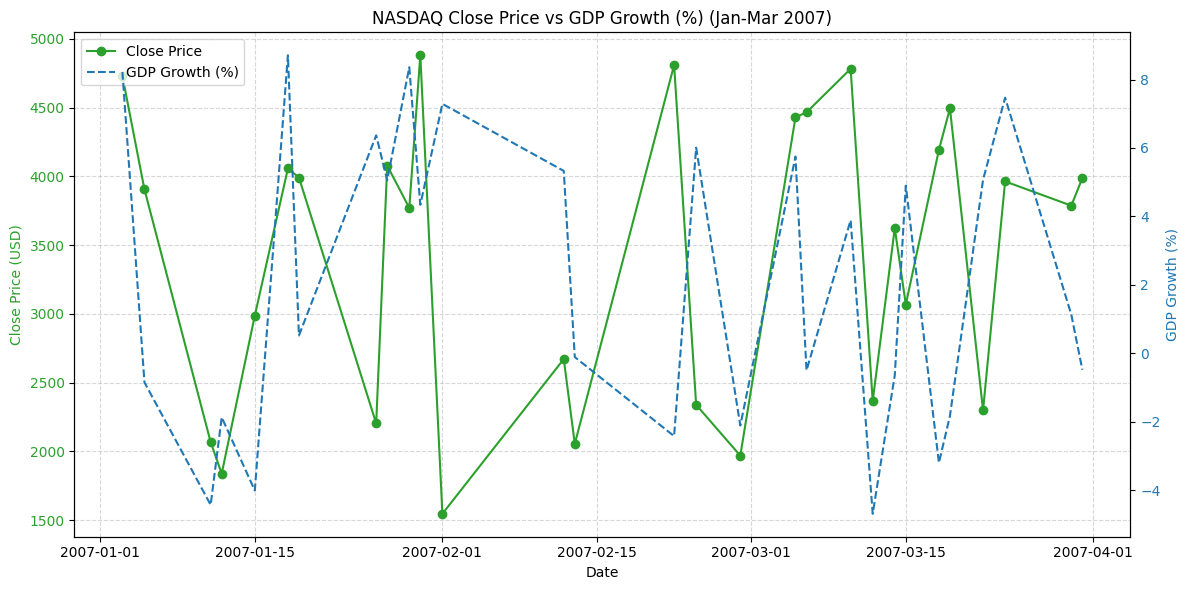

In [849]:
plot_time_series(nasdaq_df, 'NASDAQ', 'GDP Growth (%)')

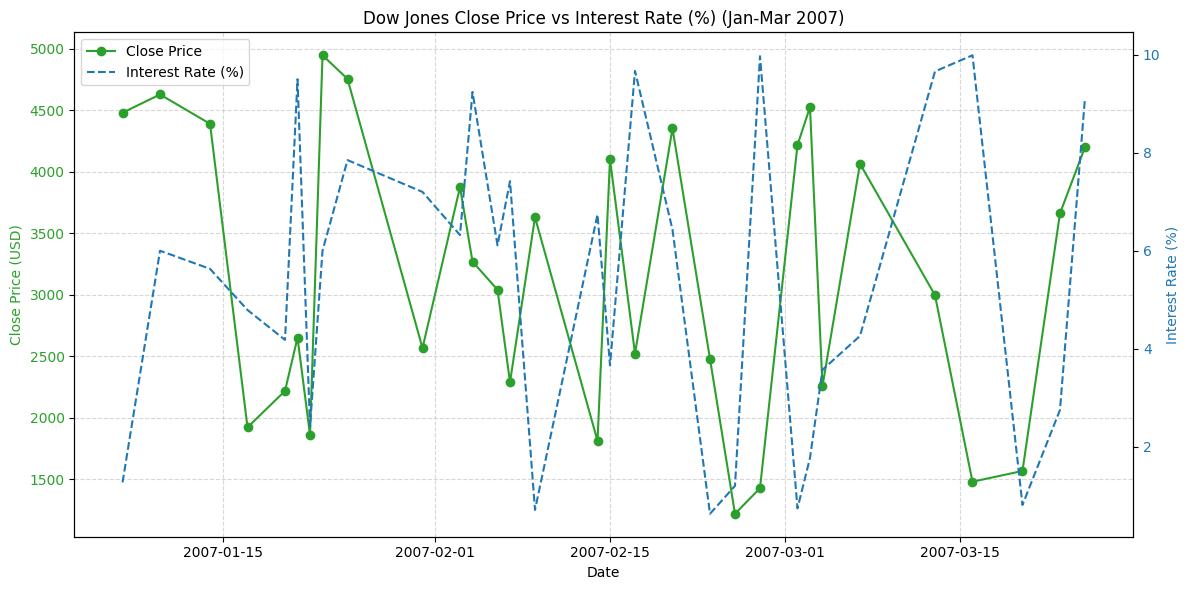

In [850]:
plot_time_series(dj_df, 'Dow Jones', 'Interest Rate (%)')

2. Heatmap of the correlations between the macroeconomic indicators and the closing price of each stock index.

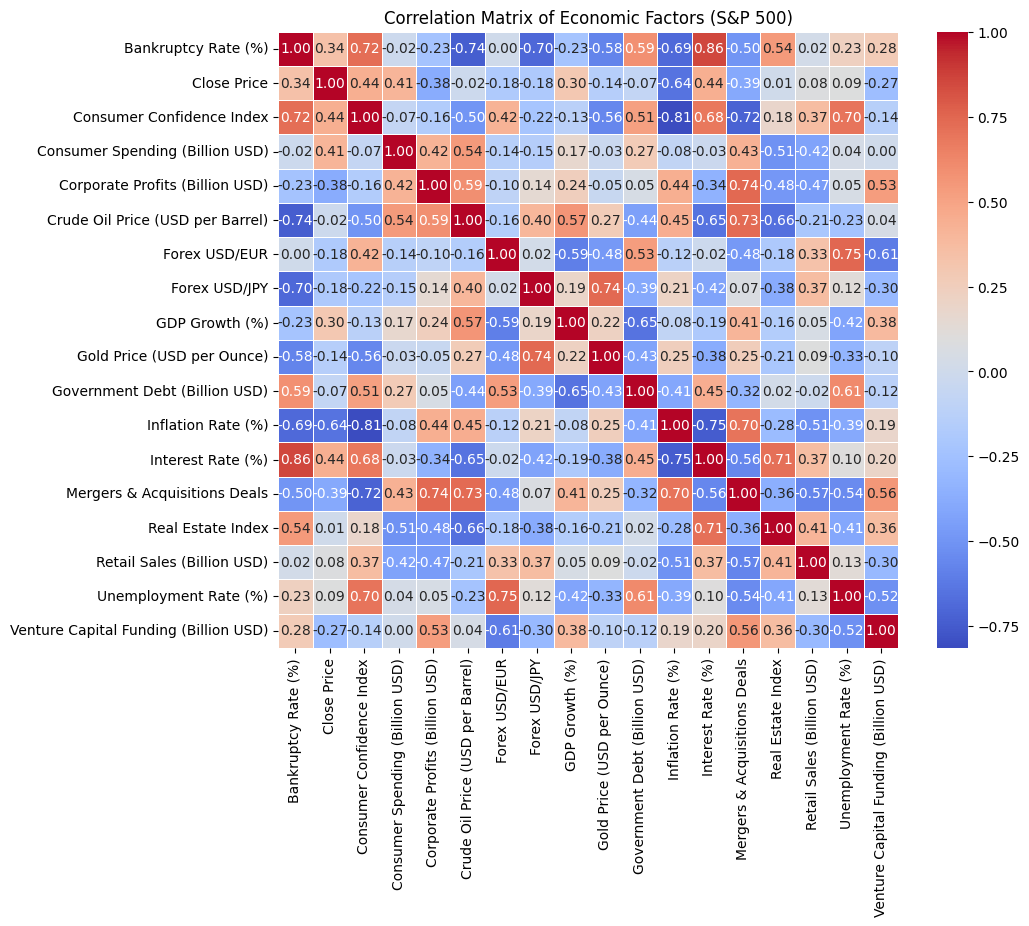

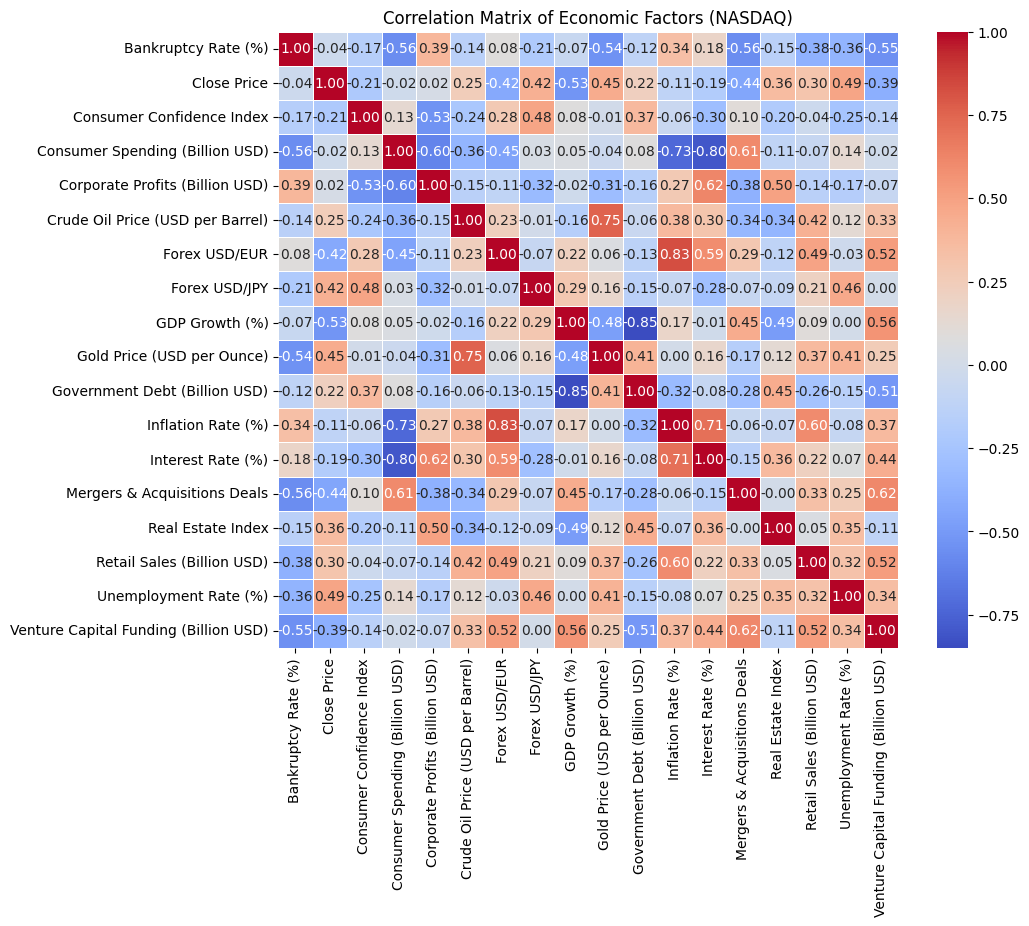

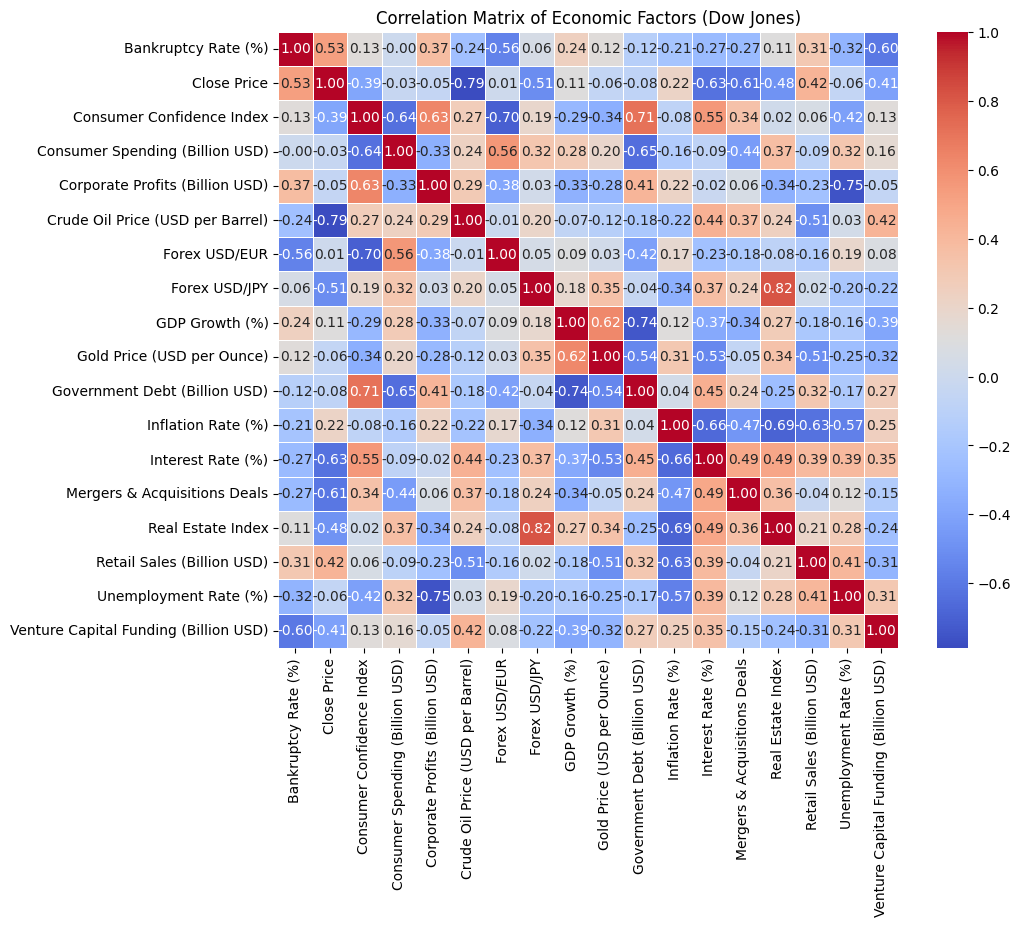

In [851]:
# Heatmap of correlations
correlation_matrix = table_snp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Factors (S&P 500)')
plt.show()

correlation_matrix = table_nasdaq.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Factors (NASDAQ)')
plt.show()

correlation_matrix = table_dj.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Factors (Dow Jones)')
plt.show()

## Hypothesis
Hypothesis 1: "The closing price of S&P 500 increases as the inflation rate decreases."  
Hypothesis 2: “As the price of Crude Oil increases, the closing price of Dow Jones index decreases."   
(Based on the heatmap).

In [852]:
hypo_df = snp_df.copy()
# ─── H ───────────────────────────────────
x1 = hypo_df['Inflation Rate (%)']
y1 = hypo_df['Close Price']

# Pearson correlation
r1, p1 = pearsonr(x1, y1)
print(f"H1 – Inflation Rate vs. Close Price: r = {r1}, p-value = {p1}\n")

# OLS regression 
X1 = sm.add_constant(x1)
model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

H1 – Inflation Rate vs. Close Price: r = -0.04486492593624985, p-value = 0.14900677360130116

                            OLS Regression Results                            
Dep. Variable:            Close Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.085
Date:                Sun, 27 Jul 2025   Prob (F-statistic):              0.149
Time:                        15:26:05   Log-Likelihood:                -8771.9
No. Observations:                1036   AIC:                         1.755e+04
Df Residuals:                    1034   BIC:                         1.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [853]:
# Copy your original DataFrame
hypo_df = dj_df.copy()

# ─── H ───────────────────────────────────────
x2 = hypo_df['Crude Oil Price (USD per Barrel)']
y2 = hypo_df['Close Price']

# Pearson correlation
r2, p2 = pearsonr(x2, y2)
print(f"\nH2 – Crude Oil Price (USD per Barrel) vs. Close Price: r = {r2}, p-value = {p2}\n")

# OLS regression
X2 = sm.add_constant(x2)
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())



H2 – Crude Oil Price (USD per Barrel) vs. Close Price: r = -0.007373104210247177, p-value = 0.8198055796546259

                            OLS Regression Results                            
Dep. Variable:            Close Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05192
Date:                Sun, 27 Jul 2025   Prob (F-statistic):              0.820
Time:                        15:26:05   Log-Likelihood:                -8099.5
No. Observations:                 957   AIC:                         1.620e+04
Df Residuals:                     955   BIC:                         1.621e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.9

Hypothesis: "High inflation rates would lead to a low Consumer Confidence Index. "

In [854]:

# Assuming df has 'Inflation Rate (%)' and 'CCI' columns
X = hypo_df['Inflation Rate (%)']
y = hypo_df['Consumer Confidence Index']  # Consumer Confidence Index

# Perform Pearson's correlation test
corr, p_value = pearsonr(X, y)

print(f"Pearson Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

# Define X and y for regression
X_const = sm.add_constant(X)  # Add intercept term (constant)
y = hypo_df['Consumer Confidence Index']

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Show the regression results
print(model.summary())



Pearson Correlation Coefficient: 0.08
P-value: 0.0199
                                OLS Regression Results                               
Dep. Variable:     Consumer Confidence Index   R-squared:                       0.006
Model:                                   OLS   Adj. R-squared:                  0.005
Method:                        Least Squares   F-statistic:                     5.442
Date:                       Sun, 27 Jul 2025   Prob (F-statistic):             0.0199
Time:                               15:26:05   Log-Likelihood:                -4236.9
No. Observations:                        957   AIC:                             8478.
Df Residuals:                            955   BIC:                             8488.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]

## Predictive Model




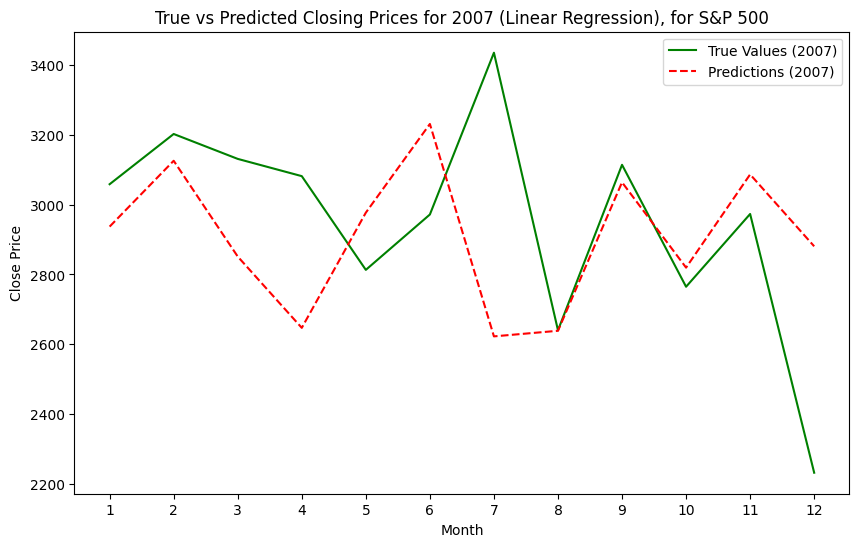

Mean Absolute Error: 251.12262642584082
Mean Squared Error: 123187.2168430306
R-squared: -0.4059782289993281


In [855]:
snp_df.set_index('Date', inplace=True)  # Set 'Date' as the index
predict_df = snp_df.copy()

# Step 3: Filter the dataset for years 2000 to 2006 for training
df_2000_2006 = predict_df[(predict_df.index.year >= 2000) & (predict_df.index.year <= 2006)].copy()

# Step 4: Extract year and month from 'Date' column for aggregation
df_2000_2006['Year'] = df_2000_2006.index.year
df_2000_2006['Month'] = df_2000_2006.index.month

# Step 5: Create a pivot table to get the monthly averages of the features for 2000-2006
monthly_pivot = df_2000_2006.pivot_table(
    index=['Year', 'Month'],
    values=['Close Price', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'],
    aggfunc='mean'
)

# Step 6: Prepare the training dataset (2000-2006) for linear regression
X_train = monthly_pivot.drop(columns=['Close Price'])  # Features
y_train = monthly_pivot['Close Price']  # Target variable (Close Price)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Filter the dataset for year 2007 (test set)
test_df = predict_df[predict_df.index.year == 2007].copy()
test_df['Year'] = test_df.index.year
test_df['Month'] = test_df.index.month

# Step 9: Create the pivot table for 2007
test_pivot = test_df.pivot_table(
    index=['Year', 'Month'],
    values=['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'],
    aggfunc='mean'
)

# Step 10: Make predictions for 2007 using the trained model
X_test = test_pivot  # Features for prediction
y_pred = model.predict(X_test)  # Predictions for the closing prices

# Ensure the true values for 2007 are extracted correctly
# Extract the true values for 2007 and group by 'Year' and 'Month'
true_values_2007 = test_df.groupby(['Year', 'Month'])['Close Price'].mean()

# Reset the index to remove the multi-index and keep only the Month
true_values_2007 = true_values_2007.reset_index(drop=True)

# Convert the index to just the month number (1 for January, 2 for February, etc.)
true_values_2007.index = true_values_2007.index + 1  # Since the index starts from 0, we add 1 to make it 1-based

# Step 2: Visualize the predictions vs actual data
plt.figure(figsize=(10, 6))
plt.plot(true_values_2007.index, true_values_2007, label='True Values (2007)', color='green')
plt.plot(true_values_2007.index, y_pred, label='Predictions (2007)', color='red', linestyle='--')  # Changed to use same index
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title('True vs Predicted Closing Prices for 2007 (Linear Regression), for S&P 500')
plt.xticks(range(1, 13))  # Ensure all months are shown
plt.legend()
plt.show()


# Step 13: Evaluate the model (if true data for 2007 is available)
mae = mean_absolute_error(true_values_2007, y_pred)
mse = mean_squared_error(true_values_2007, y_pred)
r2 = r2_score(true_values_2007, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

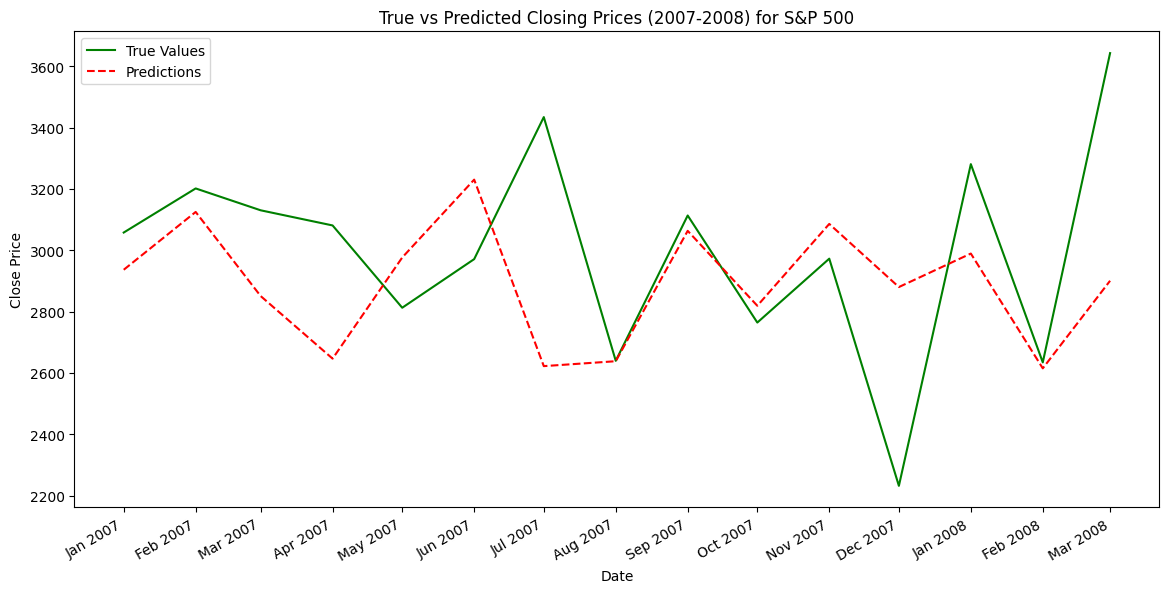

Mean Absolute Error: 271.0864017902187
Mean Squared Error: 140943.87761916232
R-squared: -0.23950149157147105


In [856]:
# Step 8: Filter the dataset for years 2007-2008 (test set)
test_df = predict_df[(predict_df.index.year >= 2007) & (predict_df.index.year <= 2008)].copy()
test_df['Year'] = test_df.index.year
test_df['Month'] = test_df.index.month

# Step 9: Create the pivot table for 2007-2008
test_pivot = test_df.pivot_table(
    index=['Year', 'Month'],
    values=['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'],
    aggfunc='mean'
)

# Step 10: Make predictions for 2007-2008 using the trained model
X_test = test_pivot  # Features for prediction
y_pred = model.predict(X_test)  # Predictions for the closing prices

# Extract the true values for 2007-2008 and group by 'Year' and 'Month'
true_values = test_df.groupby(['Year', 'Month'])['Close Price'].mean()

# Convert the MultiIndex to a readable format for plotting
true_values = true_values.reset_index()
true_values['Date'] = pd.to_datetime(true_values['Year'].astype(str) + '-' + true_values['Month'].astype(str) + '-01')
true_values.set_index('Date', inplace=True)

# Create a date index for predictions (same months as true values)
pred_dates = true_values.index

# Step 2: Visualize the predictions vs actual data
plt.figure(figsize=(14, 7))
plt.plot(true_values.index, true_values['Close Price'], label='True Values', color='green')
plt.plot(pred_dates, y_pred, label='Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('True vs Predicted Closing Prices (2007-2008) for S&P 500')
plt.legend()

# Format x-axis to show months properly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.show()

# Step 13: Evaluate the model for 2007-2008
mae = mean_absolute_error(true_values['Close Price'], y_pred)
mse = mean_squared_error(true_values['Close Price'], y_pred)
r2 = r2_score(true_values['Close Price'], y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')